In [47]:
import sys

assert sys.version_info >= (3, 7)

In [48]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [50]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [51]:
import pandas as pd

In [52]:
raw_data = pd.read_csv('data.csv', ',')

/var/folders/b7/6qr44yfd1fzcqt_n_qrxn4640000gn/T/ipykernel_1045/3260579713.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  raw_data = pd.read_csv('data.csv', ',')


In [53]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Decision Tree without grid search just by varying max depth

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

data = raw_data
X_data = raw_data[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
                   "concavity_mean", "concave points_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
                  "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                  "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
                  "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst",
                  "symmetry_worst", "fractal_dimension_worst"]].values
y_data = raw_data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
train_scores = []
test_scores = []
for i in range(1,8):
    tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_split= 2, random_state=42)
    print("Max depth is ", i)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    y_pred_train = tree_clf.predict(X_train)
    confusion = confusion_matrix(y_test, y_pred)
    confusion2 = confusion_matrix(y_train, y_pred_train)
    print("Confusion Matrix:")
    print(confusion)
    report = classification_report(y_test, y_pred, labels=["M","B"])
    accuracy_test = accuracy_score(y_test, y_pred)
    test_scores.append(accuracy_test)
    
    report_train = classification_report(y_train, y_pred_train, labels=["M","B"])
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_scores.append(accuracy_train)
    print("Classification Report for testing data:")
    print(report)
    print("Classification Report for training data:")
    print(report_train)

Max depth is  1
Confusion Matrix:
[[63  8]
 [ 4 39]]
Classification Report for testing data:
              precision    recall  f1-score   support

           M       0.83      0.91      0.87        43
           B       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Classification Report for training data:
              precision    recall  f1-score   support

           M       0.88      0.91      0.89       169
           B       0.94      0.93      0.94       286

    accuracy                           0.92       455
   macro avg       0.91      0.92      0.92       455
weighted avg       0.92      0.92      0.92       455

Max depth is  2
Confusion Matrix:
[[69  2]
 [ 6 37]]
Classification Report for testing data:
              precision    recall  f1-score   support

           M       0.95      0.86      0.90        43
          

In [153]:
#Testing the performance in the testing and testing data

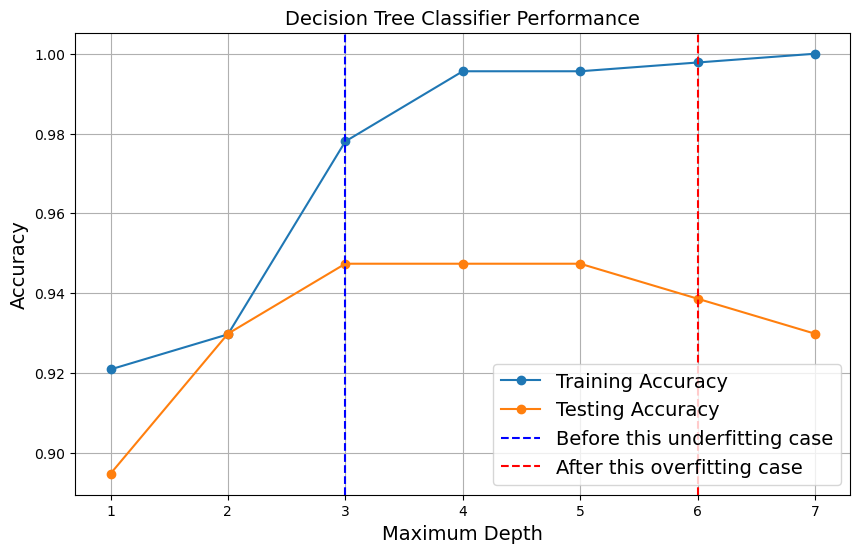

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
max_depths = [1,2,3,4,5,6,7]
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_scores, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.axvline(x=3, color='blue', linestyle='--', label='Before this underfitting case')
plt.axvline(x=6, color='red', linestyle='--', label='After this overfitting case')
plt.legend()
plt.grid(True)
plt.show()

As Maximum depth increases the accuracy in both testing and training increases. Before the max depth 3 the accuracy is less in both testing and training (can be fit well by increasing this hyperparameter and hence attributed to the underfitting scenario) and after max depth 3 till 5 we see a consistent accuracy performnce in testing however the training performance increases. After maxdepth 6 we see that the accuracy increases in training but decreases in testing which could be the overfitting scenario where the model is fitting training data very well but not testing

# Decision tree with cross validation and more hyper parameter tuning

/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  Fi

Best max depth is 4
Classification Report for Testing Data:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96       108
           M       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Testing Accuracy with Best Hyperparameters: 0.95


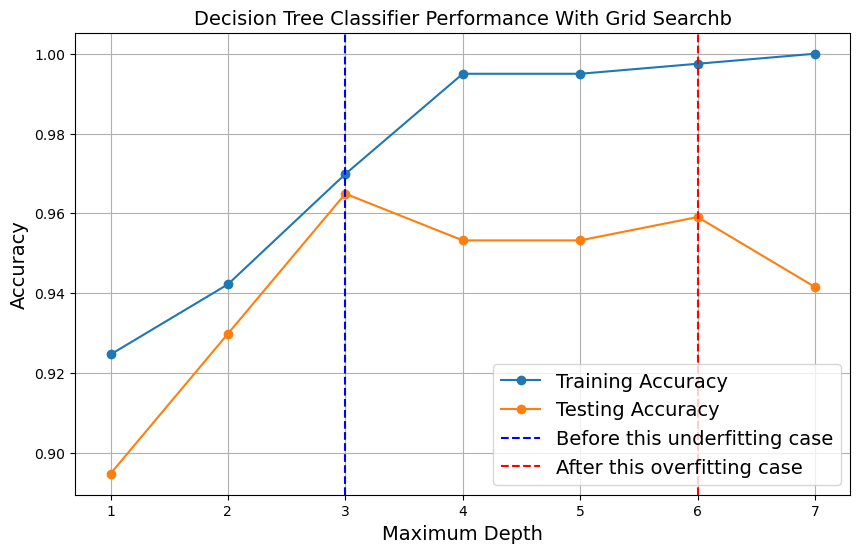

In [73]:
X_dt = raw_data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y_dt = raw_data['diagnosis']
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8],
    'min_samples_split': [1,2,3,4,5,6,7,8]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_dt_train, y_dt_train)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
print("Best max depth is", best_max_depth)

# Train the Decision Tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(
    max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
best_dt_classifier.fit(X_dt_train, y_dt_train)


y_test_pred = best_dt_classifier.predict(X_dt_test)

test_report = classification_report(y_dt_test, y_test_pred)

# Print classification reports
print("Classification Report for Testing Data:\n", test_report)

# Calculate and print accuracy for training and testing data
test_accuracy = accuracy_score(y_dt_test, y_test_pred)
print(f"Testing Accuracy with Best Hyperparameters: {test_accuracy:.2f}")

train_scores_i = []
test_scores_i = []

for i in range(1,8):
    dt_classifier_depth = DecisionTreeClassifier(max_depth= i, min_samples_split=best_min_samples_split, random_state=42)
    dt_classifier_depth.fit(X_dt_train, y_dt_train)
    y_test_pred_i = dt_classifier_depth.predict(X_dt_test)
    y_train_pred_i = dt_classifier_depth.predict(X_dt_train)
    test_accuracy = accuracy_score(y_dt_test, y_test_pred_i)
    test_scores_i.append(test_accuracy)
    train_accuracy = accuracy_score(y_dt_train, y_train_pred_i)
    train_scores_i.append(train_accuracy)
plt.figure(figsize=(10, 6))
max_depths_i = [1,2,3,4,5,6,7]
plt.plot(max_depths_i, train_scores_i, label='Training Accuracy', marker='o')
plt.plot(max_depths_i, test_scores_i, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Classifier Performance With Grid Searchb')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.axvline(x=3, color='blue', linestyle='--', label='Before this underfitting case')
plt.axvline(x=6, color='red', linestyle='--', label='After this overfitting case')
plt.legend()
plt.grid(True)
plt.show()

With Grid Search I could improve the decision tree accuracy performance a little above. We could see overfitting and underfitting clearly here as well. 

Accuracy of the model using best parameters found by the nested search is 0.95. Classification report at this point have been printed out as well.

In [63]:
from sklearn.tree import export_graphviz

export_graphviz(
        best_dt_classifier,
        out_file=str(IMAGES_PATH / "data_pm.dot"),  # path differs in the book
        feature_names=X_dt.columns,
        class_names=['M','B'],
        rounded=True,
        filled=True
    )

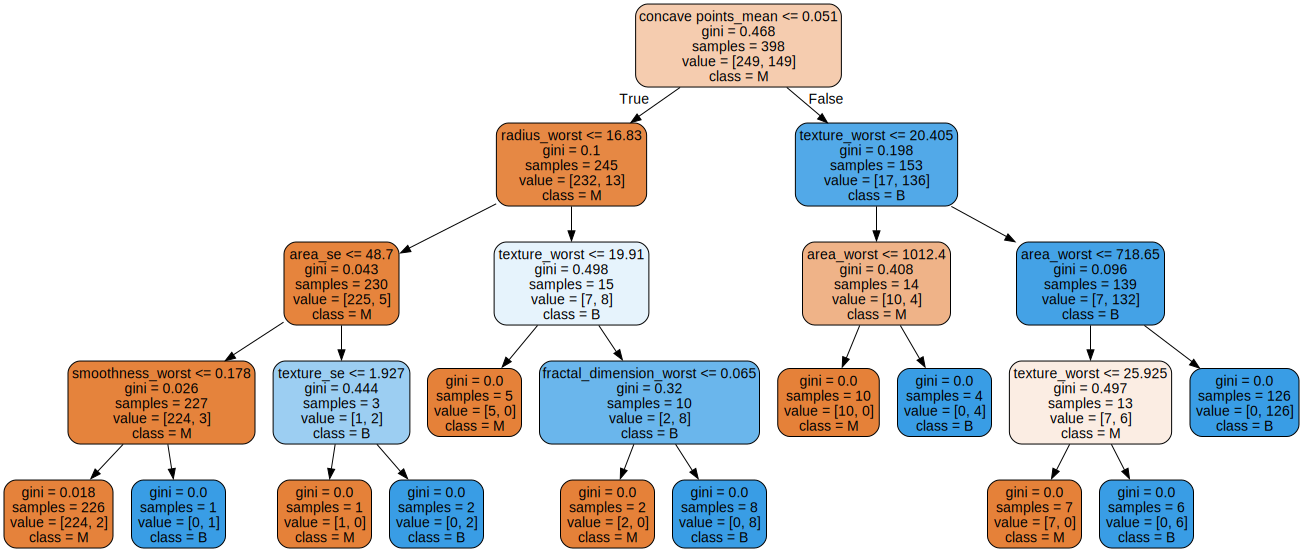

In [64]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "data_pm.dot")

In [65]:
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

# Logistic Regression with Gridsearch for hyper parameter tuning

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_LOG = raw_data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y_LOG = raw_data['diagnosis']
X_log_train_1, X_log_test_1, y_log_train_1, y_log_test_1 = train_test_split(X_LOG, y_LOG, test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the DataFrame using StandardScaler
X_scaled_train = pd.DataFrame(scaler.fit_transform(X_log_train_1), columns=X_log_train_1.columns)
X_scaled_test = pd.DataFrame(scaler.fit_transform(X_log_test_1), columns=X_log_test_1.columns)

/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

best c value is 1
Best parameter accuracy for regression is:  0.9766081871345029
Best parameter report for regression is:                precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

C value is:  0.001
              precision    recall  f1-score   support

           B       0.84      1.00      0.92       108
           M       1.00      0.68      0.81        63

    accuracy                           0.88       171
   macro avg       0.92      0.84      0.86       171
weighted avg       0.90      0.88      0.88       171

C value is:  0.01
              precision    recall  f1-score   support

           B       0.93      1.00      0.96       108
           M       1.00      0.87      0.93        63

    accuracy          

/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

C value is:  1000
              precision    recall  f1-score   support

           B       0.98      0.94      0.96       108
           M       0.90      0.97      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



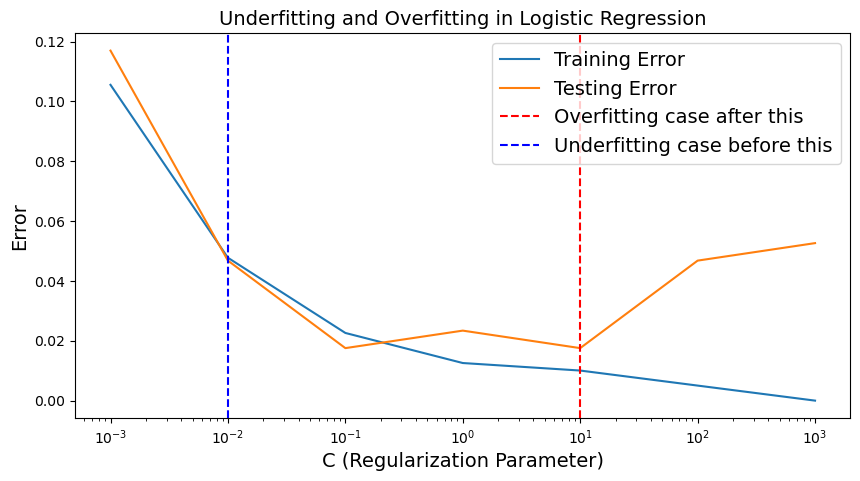

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

logistic_reg = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled_train, y_log_train_1)

# Get the best hyperparameters
best_params = grid_search.best_params_

print('best c value is' ,best_params['C'])

# Train a logistic regression model with the best hyperparameters
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_scaled_train, y_log_train_1)

# Predictions on training and testing data
y_train_pred = best_logistic_reg.predict(X_scaled_train)
y_test_pred = best_logistic_reg.predict(X_scaled_test)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(y_log_train_1, y_train_pred)
test_accuracy = accuracy_score(y_log_test_1, y_test_pred)
print('Best parameter accuracy for regression is: ', test_accuracy)
best_report = classification_report(y_log_test_1, y_test_pred)
print('Best parameter report for regression is: ', best_report)

# Create a plot to visualize underfitting and overfitting
train_errors, test_errors = [], []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    model = LogisticRegression(C=C)
    model.fit(X_scaled_train, y_log_train_1)
    report = classification_report(y_log_test_1, model.predict(X_scaled_test))
    train_errors.append(1 - accuracy_score(y_log_train_1, model.predict(X_scaled_train)))
    test_errors.append(1 - accuracy_score(y_log_test_1, model.predict(X_scaled_test)))
    print("C value is: ", C)
    print(report)

plt.figure(figsize=(10, 5))
plt.plot(C_values, train_errors, label="Training Error")
plt.plot(C_values, test_errors, label="Testing Error")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Error")
plt.title("Underfitting and Overfitting in Logistic Regression")
plt.axvline(x=10, color='red', linestyle='--', label='Overfitting case after this')
plt.axvline(x=0.01, color='blue', linestyle='--', label='Underfitting case before this')
plt.legend()
plt.xscale('log')
plt.show()







As C (Inverse of Regularisation strength increases) the model becomes more flexible (we are loosening the restrictions) hence we see the drop in error rate in both training and testing. When C was too low (10^-3) the model was not performing well enough enough both testing and training data implying underfitting. However, the error decreases consistently by increasing C and after 10 we can see the error increases in testing however it decreases in training. This is basically the overfitting case as model is fitting for the noises in the data.

Also at the best parameters, the accuracy of the model in the testing data shown to be 0.9766081871345029. I believe this is very high, I have also printed out the classification report at these parameters

# KNN with hyperparamter tuning using grid search

In [45]:
X_KNN = raw_data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y_KNN = raw_data['diagnosis']

Best K value is:  3
Best Param Accuracy is:  0.9590643274853801
Best Param classification report is:                precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
           M       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

k value is:  1
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

k value is:  2
              precision    recall  f1-score   support

           B       0.94      0.99      0.96       108
           M       0.98      0.89      0.93        63

    accuracy                           0.95       

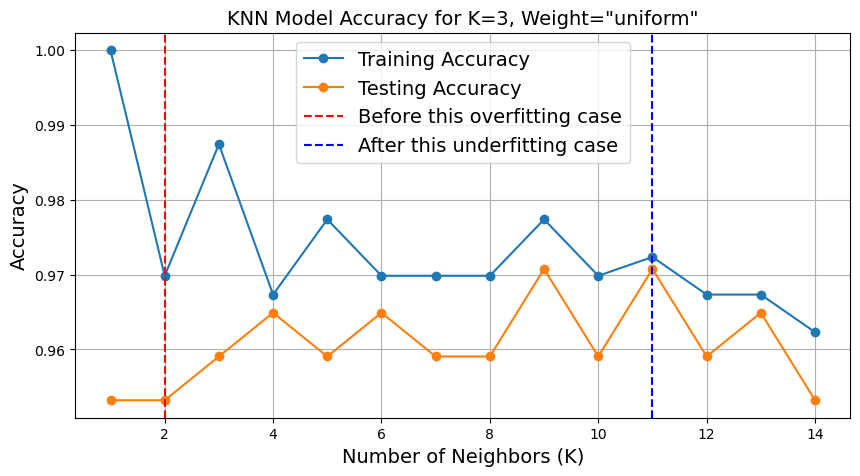

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X_KNN, y_KNN, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_KNN_train)
X_test_scaled = scaler.transform(X_KNN_test)

# Define a range of K values
k_values = list(range(1, 15))
# weight types for knn
weight_types = ['uniform', 'distance']

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid = {'n_neighbors': k_values, 'weights': weight_types}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_KNN_train)

# Get the best K value from GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
print("Best K value is: ", best_k)

# Train the KNN model with the best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
best_knn.fit(X_train_scaled, y_KNN_train)

#best param performance
y_best_test_pred = best_knn.predict(X_test_scaled)
print("Best Param Accuracy is: ", accuracy_score(y_KNN_test, y_best_test_pred))
print("Best Param classification report is: ", classification_report(y_KNN_test,y_best_test_pred))



train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=best_weights)
    knn.fit(X_train_scaled, y_KNN_train)
    
    # Predict on training and testing data
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy for both training and testing data
    train_acc = accuracy_score(y_KNN_train, y_train_pred)
    test_acc = accuracy_score(y_KNN_test, y_test_pred)
    
    # Append accuracy values to the lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    
    #classification report
    report = classification_report(y_KNN_test,y_test_pred)
    print("k value is: ", k)
    print(report)

plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Testing Accuracy')
plt.title(f'KNN Model Accuracy for K={best_k}, Weight="{best_weights}"')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')

plt.axvline(x=2, color='red', linestyle='--', label='Before this overfitting case')
plt.axvline(x=11, color='blue', linestyle='--', label='After this underfitting case')
plt.legend()
plt.grid()
plt.show()


When K is too small we can see overitting as the model learns to fit the noises in the training data set which is why the accuracy is high in the training data set but not as good in the testing. As K increases the accuracy in training decreases but testing increases as the model learns to genralise better. However after k = 11 the model performances reduces in both training and testing implying underfitting.

We see that accuracy at best parameter is 0.9590643274853801. The classification report with the outcomes are printed out as well. precision, recall, f1-score comes above 0.95 which is great here.  
